In [40]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import random

from scipy.stats import kde
from mpl_toolkits import mplot3d

from scipy.spatial import distance

In [100]:
DISTANCE = 1400
RADIUS = 6
POPULATION = 1400

In [101]:
def make_cluster():
    angles_array = np.random.random_sample((POPULATION,)) * 2 * np.pi
    distance_array = np.random.normal(loc=0, scale=RADIUS, size=POPULATION)
    
    cluster = pd.DataFrame(data={'angle':angles_array, 'distance':np.abs(distance_array)})
    
    cluster['x'] = cluster['distance'] * np.cos(cluster['angle'])
    cluster['y'] = cluster['distance'] * np.sin(cluster['angle'])
    
    return cluster

In [102]:
cluster = make_cluster()

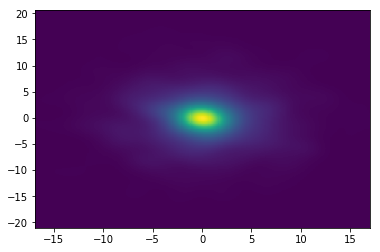

In [103]:
# create data
x = cluster['x']
y = cluster['y']
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
f = zi.reshape(xi.shape)

# Make the plot
plt.pcolormesh(xi, yi, f)
plt.show()



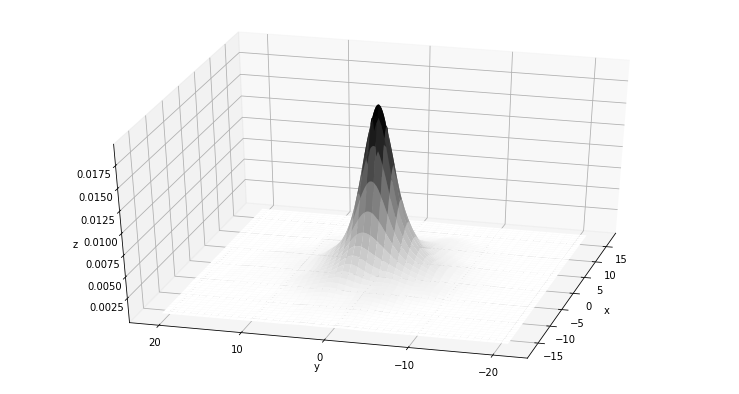

In [104]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(xi, yi, zi.reshape(xi.shape), cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(35, 195)

In [108]:
distances = distance.pdist(cluster[['x','y']], 'euclidean')

In [109]:
angular_distances = distances / DISTANCE * 206264.8

In [110]:
mask = (angular_distances < 2)
len(angular_distances[mask])

11